In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import os
os.chdir('/home/ch3859/comp-class/comp-lab-class/Week6/')

### Exercise 1 (master class): Familiarizing with alanine dipeptide

`gmx mdrun -s topolA.tpr/topolB.tpr -nsteps 10000000`

`plumed driver --plumed plumed.dat --mf_xtc traj_comp.xtc`

In [3]:
# use numpy to read in the COLVAR file
dihedrals_A = np.loadtxt('Inputs/stateA_nometad/no_metad_A.COLVAR.txt')

In [5]:
# use mdtraj to calculate the dihedral angles
traj_A = md.load('Inputs/stateA_nometad/no_metad_traj_comp.xtc', top='Inputs/stateA_nometad/dialaA.pdb')
phi_A = md.compute_phi(traj_A)
psi_A = md.compute_psi(traj_A)

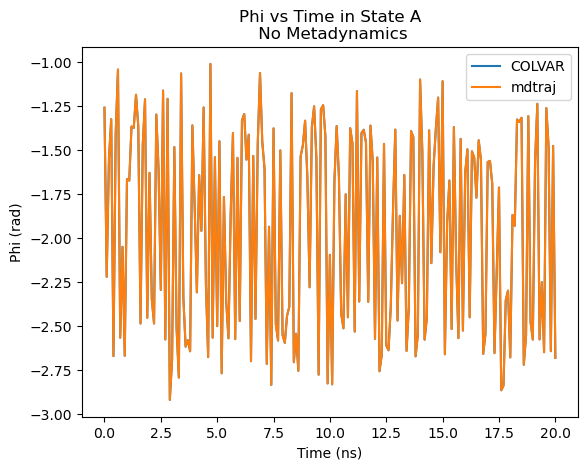

In [29]:
# plot phi every 500 steps
plt.plot(dihedrals_A[::500,0] * 0.0002, dihedrals_A[::500,1], label='COLVAR')
plt.plot(traj_A.time[::500] * 0.001, phi_A[1][::500], label='mdtraj')
plt.xlabel('Time (ns)')
plt.ylabel('Phi (rad)')
plt.legend()
plt.title('Phi vs Time in State A\n No Metadynamics')
plt.savefig('Figures/nometad_phi_vs_time_A.pdf', bbox_inches="tight")
plt.show()

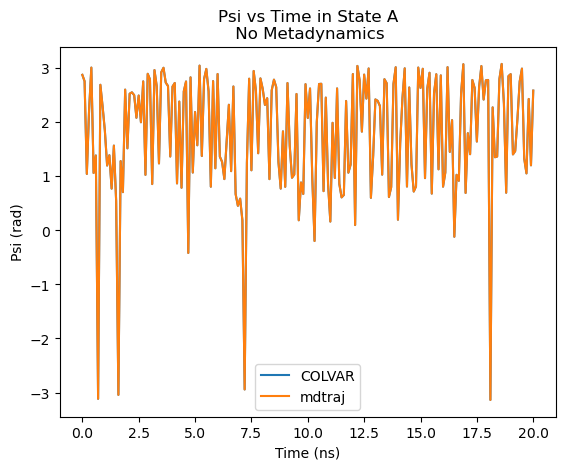

In [30]:
# plot psi every 500 steps
plt.plot(dihedrals_A[::500,0] * 0.0002, dihedrals_A[::500,2], label='COLVAR')
plt.plot(traj_A.time[::500] * 0.001, psi_A[1][::500], label='mdtraj')
# todo: calculate to prove
plt.xlabel('Time (ns)')
plt.ylabel('Psi (rad)')
plt.legend()
plt.title('Psi vs Time in State A\n No Metadynamics')
plt.savefig('Figures/nometad_psi_vs_time_A.pdf', bbox_inches="tight")
plt.show()

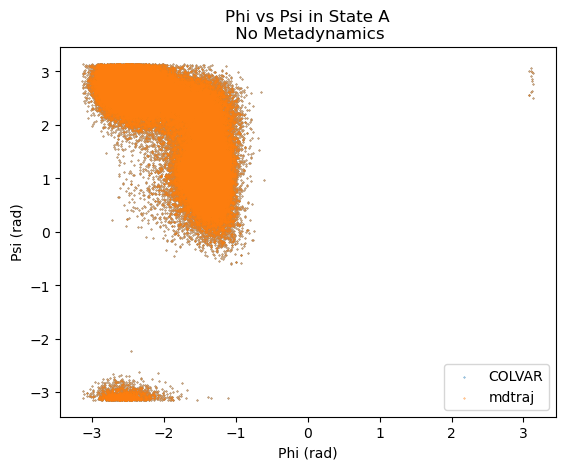

In [31]:
# plot phi vs psi with plt.scatter
plt.scatter(dihedrals_A[:,1], dihedrals_A[:,2], label='COLVAR', s=0.1)
plt.scatter(phi_A[1], psi_A[1], label='mdtraj', s=0.1)
plt.xlabel('Phi (rad)')
plt.ylabel('Psi (rad)')
plt.legend()
plt.title('Phi vs Psi in State A\n No Metadynamics')
plt.savefig('Figures/nometad_phi_vs_psi_A.pdf', bbox_inches="tight")
plt.show()

As shown above, we can see the mdtraj calculation and COLVAR output are the same results.

In [52]:
# compute the standard deviation of the dihedral angles
print('Phi standard deviation: ', np.std(phi_A[1]))
print('Psi standard deviation: ', np.std(psi_A[1]))

Phi standard deviation:  0.5538316
Psi standard deviation:  1.024898


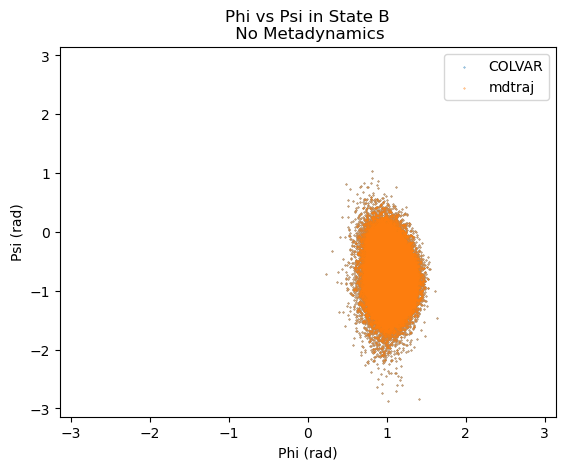

In [33]:
#plot the phi vs psi plot for state B
dihedrals_B = np.loadtxt('Inputs/stateB_nometad/no_metad_B.COLVAR.txt')
traj_B = md.load('Inputs/stateB_nometad/no_metad_traj_comp.xtc', top='Inputs/stateB_nometad/dialaB.pdb')
phi_B = md.compute_phi(traj_B)
psi_B = md.compute_psi(traj_B)

plt.scatter(dihedrals_B[:,1], dihedrals_B[:,2], label='COLVAR', s=0.1)
plt.scatter(phi_B[1], psi_B[1], label='mdtraj', s=0.1)
plt.xlabel('Phi (rad)')
plt.ylabel('Psi (rad)')
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)
plt.legend()
plt.title('Phi vs Psi in State B\n No Metadynamics')
plt.savefig('Figures/nometad_phi_vs_psi_B.pdf', bbox_inches="tight")
plt.show()

Comparison between the phi-psi space of state A and B shows that they are both trapped in certain area and not able to see the whole space.

### Exercise 1 (Lugano tutorial): Metadynamics calculation

The files for each md simulation are saved together in one specifically named folder. Therefore specific name for each file in the folder is not used here.

`gmx mdrun -s topol.tpr -nsteps 5000000 -plumed plumed.dat `

In [34]:
colvar_metad_bf10_A = np.loadtxt('Inputs/stateA_metad_phi_bf10/COLVAR')

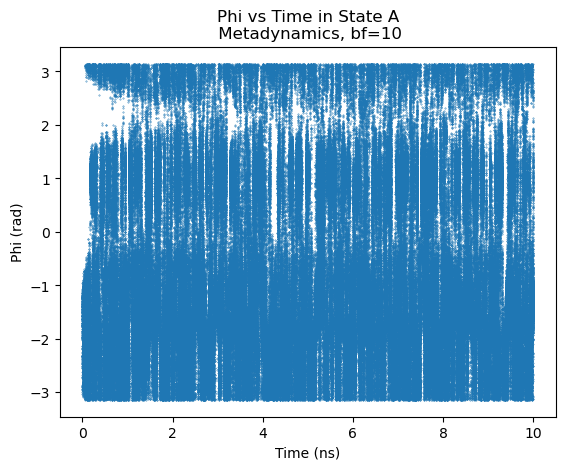

In [37]:
# plot phi every 500 steps
plt.scatter(colvar_metad_bf10_A[:,0] * 0.001, colvar_metad_bf10_A[:,1], s=0.1)
plt.xlabel('Time (ns)')
plt.ylabel('Phi (rad)')
plt.title('Phi vs Time in State A\n Metadynamics, bf=10')
plt.savefig('Figures/metad_phi_bf10_phi_vs_time.pdf', bbox_inches="tight")
plt.show()

It's shown here that $\Phi$ can go through all the possible value to explore larger area using metadynamics.

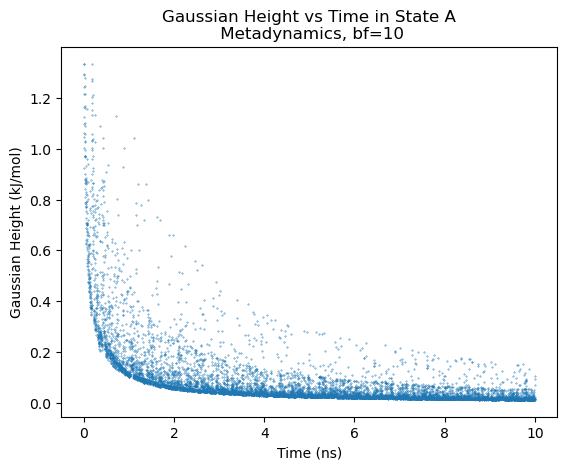

In [42]:
# plot the Gaussian height vs time from HILLS
hill_metad_bf10_A = np.loadtxt('Inputs/stateA_metad_phi_bf10/HILLS')
plt.scatter(hill_metad_bf10_A[:,0] * 0.001, hill_metad_bf10_A[:,3], s=0.1)
plt.xlabel('Time (ns)')
plt.ylabel('Gaussian Height (kJ/mol)')
plt.title('Gaussian Height vs Time in State A\n Metadynamics, bf=10')
plt.savefig('Figures/metad_phi_bf10_hill_vs_time.pdf', bbox_inches="tight")
plt.show()

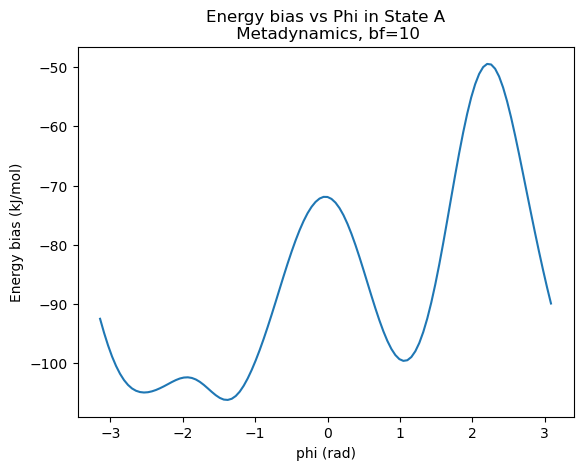

In [6]:
# plot the negative of the energy column from the grid file
grid_metad_bf10_A = np.loadtxt('Inputs/stateA_metad_phi_bf10/metad_bf10_A.grid.dat', comments='#')
plt.plot(grid_metad_bf10_A[:,0], -grid_metad_bf10_A[:,1])
plt.xlabel('phi (rad)')
plt.ylabel('Energy bias (kJ/mol)')
plt.title('Energy bias vs Phi in State A\n Metadynamics, bf=10')
plt.savefig('Figures/metad_phi_bf10_grid_e_vs_phi.pdf', bbox_inches="tight")
plt.show()

`plumed sum_hills --hills HILLS`

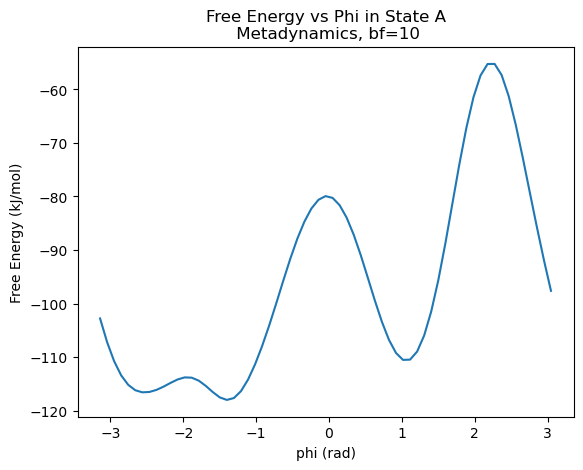

In [10]:
# plot the free energy surface from fes.dat generated by HILLS
fes_metad_bf10_A = np.loadtxt('Inputs/stateA_metad_phi_bf10/fes_final.dat', comments='#')
plt.plot(fes_metad_bf10_A[:,0], fes_metad_bf10_A[:,1])
plt.xlabel('phi (rad)')
plt.ylabel('Free Energy (kJ/mol)')
plt.title('Free Energy vs Phi in State A\n Metadynamics, bf=10')
plt.savefig('Figures/metad_phi_bf10_fes_vs_phi.pdf', bbox_inches="tight")
plt.show()

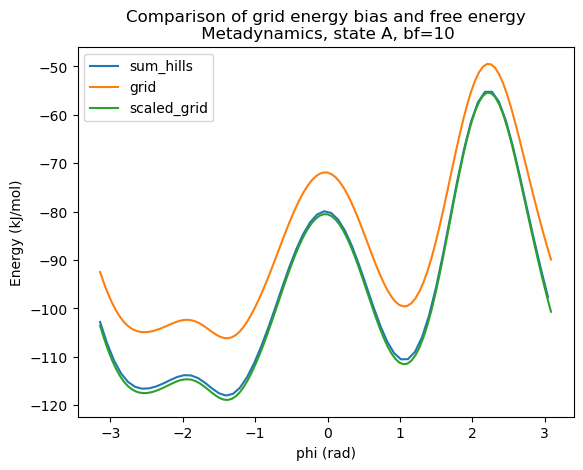

In [33]:
# compare two energy biases from the grid file and the sum_hill
scale = 1.12
plt.plot(fes_metad_bf10_A[:,0], fes_metad_bf10_A[:,1], label='sum_hills')
plt.plot(grid_metad_bf10_A[:,0], -grid_metad_bf10_A[:,1], label='grid')
plt.plot(grid_metad_bf10_A[:,0], -grid_metad_bf10_A[:,1] * scale, label='scaled_grid')
plt.xlabel('phi (rad)')
plt.ylabel('Energy (kJ/mol)')
plt.title('Comparison of grid energy bias and free energy\n Metadynamics, state A, bf=10')
plt.legend()
plt.savefig('Figures/metad_phi_bf10_grid_vs_fes.pdf', bbox_inches="tight")
plt.show()

The energy bias from grid file has the same shape as the free energy from sum_hills, but the values are different. After scaled with a factor around 1.12, two curves coincide.

`plumed sum_hills --hills HILLS --stride 200 --mintozero`

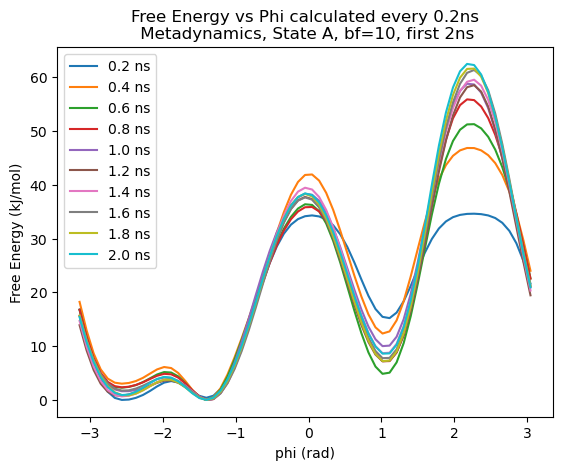

In [43]:
# plot the free energy every 200 Gaussian kernels deposited for the first 10 fes
for i in range(10):
    fes = np.loadtxt('Inputs/stateA_metad_phi_bf10/fes_stride_200/fes_'+str(i)+'.dat', comments='#')
    plt.plot(fes[:,0], fes[:,1], label="{:.1f}".format((i + 1) * 0.2) + ' ns')
plt.xlabel('phi (rad)')
plt.ylabel('Free Energy (kJ/mol)')
plt.title('Free Energy vs Phi calculated every 0.2ns\n Metadynamics, State A, bf=10, first 2ns')
plt.legend()
plt.savefig('Figures/metad_phi_bf10_fes_vs_phi_stride_200.pdf', bbox_inches="tight")
plt.show()

## 2D metadynamics in $\phi$ and $\psi$

run the metadynamics for 10 ns:

`gmx_mpi mdrun -s topolA.tpr -nsteps 5000000 -plumed plumed.dat`

Use `sum_hills` to get the free energy surface:

`plumed sum_hills --hills HILLS --stride 100 --mintozero`

Files are saved in the folder `fes_stride_100`

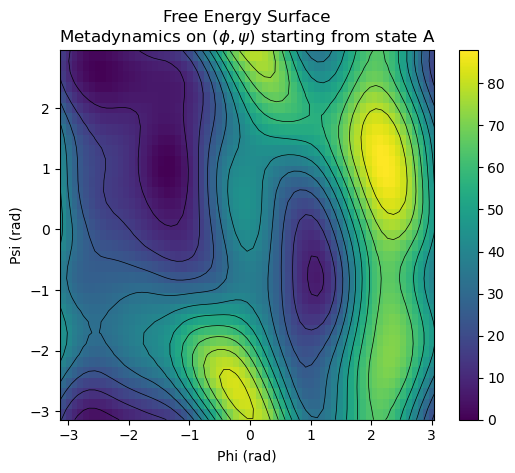

In [62]:
# plot the free energy surface for the last fes file

fes_last = np.loadtxt('Inputs/stateA_metad_phipsi/fes_stride_100/fes_100.dat', comments='#')
fes_last_e = fes_last[:, 2].reshape((35, 65))
fes_last_phi = fes_last[:, 0].reshape((35, 65))[0]
phi_min = fes_last_phi.min()
phi_max = fes_last_phi.max()
fes_last_psi = fes_last[:, 1].reshape((35, 65))[:, 0]
psi_min = fes_last_psi.min()
psi_max = fes_last_psi.max()

fig, ax = plt.subplots()
im = ax.imshow(fes_last_e, cmap='viridis', origin='lower', extent=[phi_min, phi_max, psi_min, psi_max])
contour = ax.contour(fes_last_phi, fes_last_psi, fes_last_e, extent=[phi_min, phi_max, psi_min, psi_max], colors='black', linewidths=0.5, levels=10)

ax.set_xlabel('Phi (rad)')
ax.set_ylabel('Psi (rad)')
ax.set_title('Free Energy Surface\nMetadynamics on $(\phi, \psi)$ starting from state A')
fig.colorbar(im, ax=ax)
plt.savefig('Figures/fes_A_metad_phipsi_last.pdf', bbox_inches="tight")

plt.show()

This figure shows 3 local minimum, including the metastable state at (1, -1) in phi-psi space.

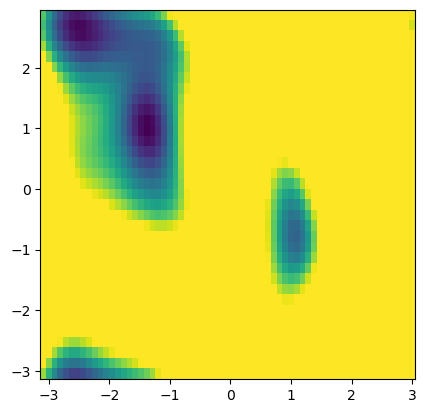

In [54]:
from matplotlib import animation

# plot the free energy surface in animation
fig, ax = plt.subplots()
fes_0 = np.loadtxt('Inputs/stateA_metad_phipsi/fes_stride_100/fes_'+str(0)+'.dat', comments='#')
fes_0_e = fes_0[:, 2].reshape((35, 65))
im = ax.imshow(fes_0_e, origin='lower', extent=[phi_min, phi_max, psi_min, psi_max])

def init():
    im.set_array(fes_0_e)
    return [im]

def animate(i):
    fes = np.loadtxt('Inputs/stateA_metad_phipsi/fes_stride_100/fes_'+str(i)+'.dat', comments='#')
    fes_e = fes[:, 2].reshape((35, 65))
    im.set_array(fes_e)
    return [im]

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=101, interval=500, blit=True)

anim.save('Figures/fes_A_metad_phipsi_anim.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In the animation we can see that the metastable point occurs soon after the mdrun begins. Below we show that at the third snapshot (after 2 Gaussians added) this point already occurs.

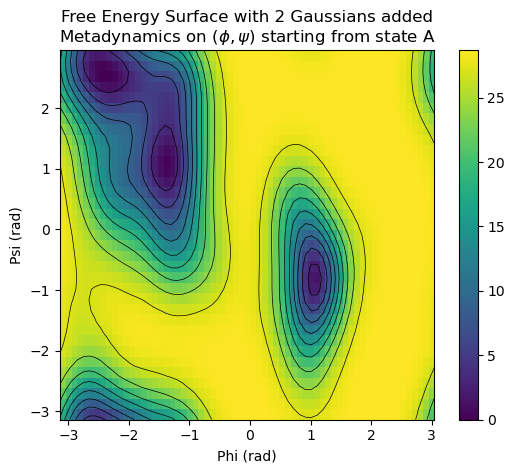

In [61]:
fes_02 = np.loadtxt('Inputs/stateA_metad_phipsi/fes_stride_100/fes_2.dat', comments='#')
fes_e = fes_02[:, 2].reshape((35, 65))
fes_phi = fes_02[:, 0].reshape((35, 65))[0]
phi_min = fes_phi.min()
phi_max = fes_phi.max()
fes_psi = fes_02[:, 1].reshape((35, 65))[:, 0]
psi_min = fes_psi.min()
psi_max = fes_psi.max()

fig, ax = plt.subplots()
im = ax.imshow(fes_e, cmap='viridis', origin='lower', extent=[phi_min, phi_max, psi_min, psi_max])
contour = ax.contour(fes_phi, fes_psi, fes_e, extent=[phi_min, phi_max, psi_min, psi_max], colors='black', linewidths=0.5, levels=10)

ax.set_xlabel('Phi (rad)')
ax.set_ylabel('Psi (rad)')
ax.set_title('Free Energy Surface with 2 Gaussians added\nMetadynamics on $(\phi, \psi)$ starting from state A')
fig.colorbar(im, ax=ax)
plt.savefig('Figures/fes_A_metad_phipsi_2Gadded.pdf', bbox_inches="tight")

plt.show()